In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
from skimage import exposure, feature,measure
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import imutils
import cv2


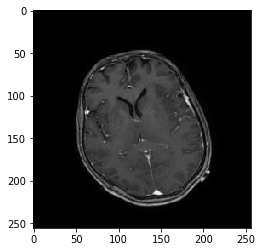

In [ ]:
image=io.imread("/content/drive/My Drive/SIH/augmented_image_36.jpg",as_gray=True)
plt.imshow(image,'gray')

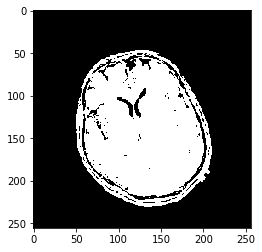

In [ ]:
ret,thresh=cv2.threshold(image,40,255,cv2.THRESH_BINARY)
plt.imshow(thresh,'gray')

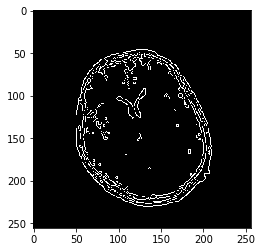

In [ ]:
med_val=np.median(thresh)
l_t=int(max(0,(1-0.33)*med_val))
u_t=int(max(255,(1+0.33)*med_val))
blur_img=cv2.medianBlur(thresh,3)
i_c=cv2.Canny(thresh,l_t,u_t)
plt.imshow(i_c,cmap='gray')

TypeError: ignored

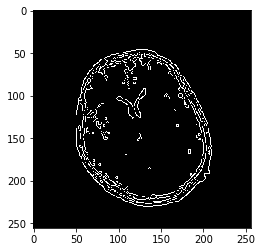

In [ ]:
kernel = np.ones((1,1),np.uint8) #square image kernel used for erosion
erosion = cv2.erode(i_c, kernel,iterations = 1) #refines all edges in the binary image

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #this is for further removing small noises and holes in the image

#plt.imshow(closing,'gray') #Figure 2
#plt.xticks([]), plt.yticks([])
#plt.show()

contours = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours with simple approximation
grab_cnt=imutils.grab_contours(contours)

plt.imshow(closing,'gray') #Figure 3
cv2.drawContours(closing, contours, -1, (255, 255, 255), 4)
#plt.imshow(closing,'gray')